## [教學重點]
學習使用 sklearn 中的 linear regression 模型，並理解各項參數的意義

## [範例重點]
觀察丟進模型訓練的資料格式，輸入 linear regression 與 Logistic regression 的資料有甚麼不同?

## import 需要的套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
plt.style.use('seaborn')

### Linear regssion

In [2]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = diabetes.data[:, np.newaxis, 2] # 增加一個維度
print("Data shape: ", X.shape) # 可以看見有 442 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, diabetes.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

Data shape:  (442, 1)


In [3]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [934.05431907]
Mean squared error: 2569.69


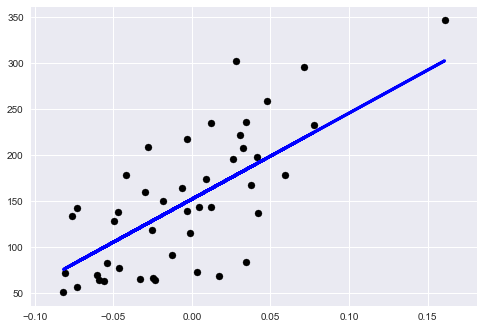

In [4]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

### Logistics regression

In [5]:
from sklearn.preprocessing import MinMaxScaler

# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 做特徵伸縮 
MMEncoder = MinMaxScaler()
iris.data = MMEncoder.fit_transform(iris.data)

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

In [6]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9333333333333333


#### Visualization

In [7]:
import pandas as pd
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris['class'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


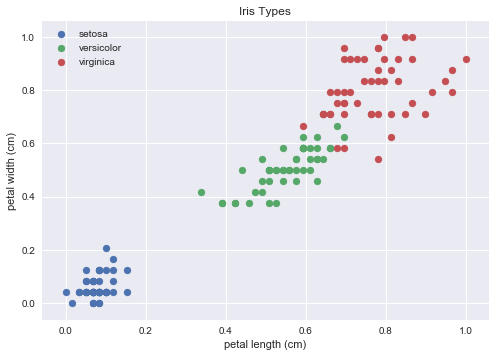

In [8]:
iris_types = [0, 1, 2]

# Pick the Iris parameters for consideration.
x_axis = 'petal length (cm)'
y_axis = 'petal width (cm)'

# Plot the scatter for every type of Iris.
for iris_type in iris_types:
    plt.scatter(
        df_iris[x_axis][df_iris['class'] == iris_type],
        df_iris[y_axis][df_iris['class'] == iris_type],
        label=iris_type
    )

# Plot the data.    
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Iris Types')
plt.legend(iris.target_names)
plt.show()

#### Draw dicision boundary [plt.contour](https://matplotlib.org/3.2.2/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py)

In [13]:
# train with petal length and width
logistic = linear_model.LogisticRegression()
logistic.fit(x_train[:, 2:4], y_train)
print(f'train accuracy: {logistic.score(x_train[:, 2:4], y_train)}')

train accuracy: 0.9629629629629629


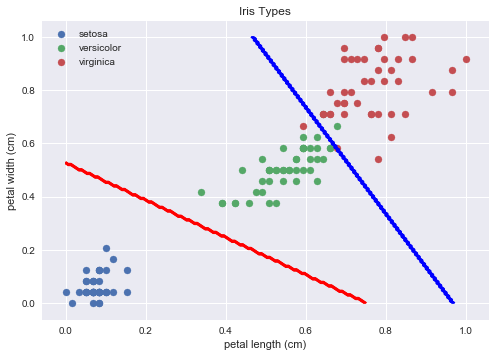

In [10]:
num_examples = x_train.shape[0]

# Set up how many calculations we want to do along every axis. 
samples = 150

# Generate test ranges for x and y axis.
x_min = np.min(x_train[:, 2]) # petal length
x_max = np.max(x_train[:, 2]) # petal length

y_min = np.min(x_train[:, 3]) # petal width
y_max = np.max(x_train[:, 3]) # petal width

X = np.linspace(x_min, x_max, samples)
Y = np.linspace(y_min, y_max, samples)

# z axis will contain our predictions. So let's get predictions for every pair of x and y.
Z_setosa = np.zeros((samples, samples))
Z_versicolor = np.zeros((samples, samples))
Z_virginica = np.zeros((samples, samples))

for x_index, x in enumerate(X):
    for y_index, y in enumerate(Y):
        data = np.array([[x, y]])
        prediction = logistic.predict(data)[0]
        if prediction == 0:
            Z_setosa[x_index][y_index] = 1
        elif prediction == 1:
            Z_versicolor[x_index][y_index] = 1
        elif prediction == 2:
            Z_virginica[x_index][y_index] = 1

# Now, when we have x, y and z axes being setup and calculated we may print decision boundaries.
for iris_type in iris_types:
    plt.scatter(
        x_train[(y_train == iris_type).flatten(), 2],
        x_train[(y_train == iris_type).flatten(), 3],
        label=iris_type
    )

plt.contour(X, Y, Z_setosa, colors = 'red')
#plt.contour(X, Y, Z_versicolor)
plt.contour(X, Y, Z_virginica, colors = 'blue')
    
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Iris Types')
plt.legend(iris.target_names)
plt.show()

## [作業重點]
了解其他資料集的使用方法，如何將資料正確地送進模型訓練

## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

In [8]:
wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！